In [1]:
##System Path
import os, sys, numpy as np
root = os.getcwd()
path =root+"/../../"
img_dir = root+"/img"
sys.path.append(path)

if(not os.path.exists(img_dir)):
    os.mkdir(img_dir)
img_dir


'C:\\Users\\benja\\OneDrive - ETH Zürich\\PhD\\Code\\ensembler_public\\examples\\dev/img'

# Basic Examples
## Potential

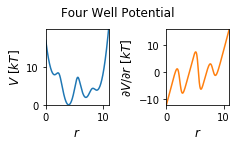

In [2]:
#imports
import numpy as np
from ensembler.potentials.OneD import fourWellPotential
from ensembler.visualisation.plotPotentials import plot_1DPotential

#build potential
V = fourWellPotential(Vmax=4, a=1.5, b=4.0, c=7.0, d=9.0,  ah=2., bh=0., ch=0.5, dh=1.)

#visualize
positions = np.linspace(start=0, stop=11, num=1000) #phase space to be visualized
fig, outpath = plot_1DPotential(potential=V, positions=positions, title="Four Well Potential")

In [3]:
fig, outpath = plot_1DPotential(potential=V, positions=positions, title="Four Well Potential", out_path=img_dir+"/four_well.png")


initializing Langevin old Positions	 





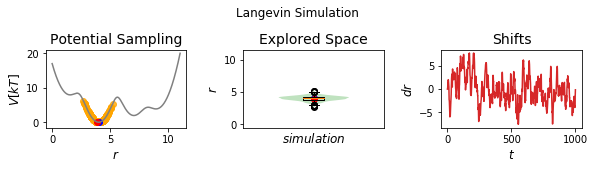

In [4]:
#Langevin integration simulation:
##Imports
from ensembler.potentials.OneD import fourWellPotential
from ensembler.samplers.stochastic import langevinIntegrator
from ensembler.system import system
from ensembler.visualisation.plotSimulations import static_sim_plots

##Simulation Setup
V = fourWellPotential(Vmax=4, a=1.5, b=4.0, c=7.0, d=9.0,  ah=2., bh=0., ch=0.5, dh=1.)

sampler = langevinIntegrator(dt=0.1, gamma=10)

system1 = system(potential=V, sampler=sampler,  start_position=4,  temperature=1)

##Simulate
cur_state = system1.simulate(steps=1000)

##Visualize
positions = np.linspace(start=0, stop=10, num=1000) #phase space to be visualized
fig, out_path = static_sim_plots(system=system1, title="Langevin Simulation", limits_coordinate_space=positions)


In [5]:
fig, out_pSath = static_sim_plots(system1, title="Langevin Simulation", limits_coordinate_space=positions, out_path=img_dir+"/langevin_simulation.png")


<string>:2: RuntimeWarning: overflow encountered in exp
<string>:2: RuntimeWarning: invalid value encountered in multiply
<string>:2: RuntimeWarning: overflow encountered in exp
<string>:2: RuntimeWarning: invalid value encountered in multiply
<string>:2: RuntimeWarning: invalid value encountered in add
<string>:2: RuntimeWarning: overflow encountered in exp
<string>:2: RuntimeWarning: invalid value encountered in multiply
<string>:2: RuntimeWarning: overflow encountered in exp
<string>:2: RuntimeWarning: invalid value encountered in multiply
<string>:2: RuntimeWarning: invalid value encountered in add
<string>:2: RuntimeWarning: overflow encountered in exp
<string>:2: RuntimeWarning: invalid value encountered in multiply
<string>:2: RuntimeWarning: overflow encountered in exp
<string>:2: RuntimeWarning: invalid value encountered in multiply
<string>:2: RuntimeWarning: invalid value encountered in add
<string>:2: RuntimeWarning: overflow encountered in exp
<string>:2: RuntimeWarning: i

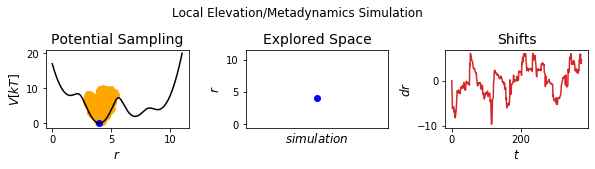

In [12]:
#Local elevation/metadynamics simulation:
##Imports
from ensembler.potentials.OneD import fourWellPotential, metadynamicsPotential
from ensembler.samplers.stochastic import langevinIntegrator
from ensembler.system import system
from ensembler.visualisation.plotSimulations import static_sim_plots

##Simulation Setup
origpot = fourWellPotential(Vmax=4, a=1.5, b=4.0, c=7.0, d=9.0,  ah=2., bh=0., ch=0.5, dh=1.)
V = metadynamicsPotential(origpot, amplitude=0.5, sigma=0.2, n_trigger=5)

sampler = langevinIntegrator(dt=0.1, gamma=10, old_Position=3)

system2=system(potential=V, sampler=sampler, start_position=4, temperature=0.1)

##Simulate
cur_state = system2.simulate(steps=1000,withdraw_traj=True, init_system=True)

##Visualize
positions = np.linspace(start=0, stop=10, num=1000) #phase space to be visualized
fig, out_path = static_sim_plots(system=system2, title="Local Elevation/Metadynamics Simulation", limits_coordinate_space=positions)


In [ ]:
##visualize
fig, out_path = static_sim_plots(sys, title="Local Elevation/ Metadynamics", x_range=positions, out_path=img_dir+"/metaDynamics_simulation.png")


In [13]:
system2.trajectory

,position,temperature,total_system_energy,total_potential_energy,total_kinetic_energy,dhdpos,velocity
0,4.000000,0.1,-0.001341,-0.001344,0.000003,0.003428,0.00248
1,4.835109,0.1,3.243564,3.243564,NaN,-3.069270,NaN
2,4.987802,0.1,4.216229,4.216229,NaN,-6.228844,NaN
3,5.035396,0.1,4.422251,4.422251,NaN,-6.029553,NaN
4,5.006450,0.1,4.208859,4.208859,NaN,-5.911094,NaN
...,...,...,...,...,...,...,...
996,NaN,0.1,NaN,NaN,NaN,NaN,NaN
997,NaN,0.1,NaN,NaN,NaN,NaN,NaN
998,NaN,0.1,NaN,NaN,NaN,NaN,NaN
999,NaN,0.1,NaN,NaN,NaN,NaN,NaN


In [14]:
vars(sampler)

{'dt': 0.1,
 'gamma': 10,
 '_oldPosition': array(nan),
 '_first_step': True,
 'R_x': 3.5744542669388446,
 'newForces': nan,
 'currentPosition': array(nan),
 'currentVelocity': array(None, dtype=object)}